In [42]:
!aws s3 ls project-group5-k

2021-11-25 23:21:54      40949 blue-pixel100.png
2021-11-25 23:21:54      46282 blue-pixel110.png
2021-11-25 23:21:54      51604 blue-pixel120.png
2021-11-25 23:21:54      58082 blue-pixel130.png
2021-11-25 23:21:54      50925 blue-pixel144.png
2021-11-25 23:21:54      10737 blue-pixel30.png
2021-11-25 23:21:54      13302 blue-pixel40.png
2021-11-25 23:21:54      17797 blue-pixel50.png
2021-11-25 23:21:54      22235 blue-pixel60.png
2021-11-25 23:21:54      27673 blue-pixel70.png
2021-11-25 23:21:54      30455 blue-pixel80.png
2021-11-25 23:21:54      35668 blue-pixel90.png
2021-11-25 23:21:54      50530 green-pixel100.png
2021-11-25 23:21:54      57215 green-pixel110.png
2021-11-25 23:21:54      64292 green-pixel120.png
2021-11-25 23:21:54      72898 green-pixel130.png
2021-11-25 23:21:54      63741 green-pixel144.png
2021-11-25 23:21:54      12454 green-pixel30.png
2021-11-25 23:21:54      16350 green-pixel40.png
2021-11-25 23:21:54      21193 green-pixel50.png
2021-11-25 23:21:54   

In [43]:
import boto3

In [44]:
textract = boto3.client('textract')

In [45]:
# create a dataframe to store the confidence scores
import numpy as np
array = np.zeros((21,12))
array
import pandas as pd
df = pd.DataFrame(array, columns = ['144','130','120','110','100','90','80','70','60','50','40','30'])
redDF = df.copy()
greenDF = df.copy()
blueDF = df.copy()

In [46]:
s3_resource = boto3.resource('s3')
my_bucket = s3_resource.Bucket('project-group5-k')
summaries = my_bucket.objects.all()
images = []
for image in summaries:
    images.append(image.key)

In [47]:
red_unorder = []
for image in images:
    if image.startswith('red'):
        red_unorder.append(image)
red = red_unorder[5:] + red_unorder[:5]
red.reverse()
red

['red-pixel144.png',
 'red-pixel130.png',
 'red-pixel120.png',
 'red-pixel110.png',
 'red-pixel100.png',
 'red-pixel90.png',
 'red-pixel80.png',
 'red-pixel70.png',
 'red-pixel60.png',
 'red-pixel50.png',
 'red-pixel40.png',
 'red-pixel30.png']

In [48]:
green_unorder = []
for image in images:
    if image.startswith('green'):
        green_unorder.append(image)
green = green_unorder[5:] + green_unorder[:5]
green.reverse()
green

['green-pixel144.png',
 'green-pixel130.png',
 'green-pixel120.png',
 'green-pixel110.png',
 'green-pixel100.png',
 'green-pixel90.png',
 'green-pixel80.png',
 'green-pixel70.png',
 'green-pixel60.png',
 'green-pixel50.png',
 'green-pixel40.png',
 'green-pixel30.png']

In [49]:
blue_unorder = []
for image in images:
    if image.startswith('blue'):
        blue_unorder.append(image)
blue = blue_unorder[5:] + blue_unorder[:5]
blue.reverse()
blue

['blue-pixel144.png',
 'blue-pixel130.png',
 'blue-pixel120.png',
 'blue-pixel110.png',
 'blue-pixel100.png',
 'blue-pixel90.png',
 'blue-pixel80.png',
 'blue-pixel70.png',
 'blue-pixel60.png',
 'blue-pixel50.png',
 'blue-pixel40.png',
 'blue-pixel30.png']

In [50]:
col = 0
for image in red:
    response = textract.detect_document_text(
        Document={
            'S3Object': {
                'Bucket': "project-group5-k",
                'Name': image
            }
        })
    row = 0
    for item in response['Blocks']:
        if item['BlockType']=='LINE':
            redDF.iloc[row,col] = item['Confidence']
            row += 1
    col += 1
redDF

,144,130,120,110,100,90,80,70,60,50,40,30
0,99.920830,99.930504,13.772729,99.916855,99.855927,0.0,99.364815,9.687783,99.366623,96.972672,86.8881,0.0
1,99.920967,99.911827,23.784285,99.917961,99.911407,0.0,99.365387,0.000000,99.366425,99.354103,0.0000,0.0
2,99.907089,99.903061,24.521917,99.929932,99.894539,0.0,99.349670,0.000000,99.356544,99.355530,0.0000,0.0
3,99.878601,99.909798,27.665478,99.899467,99.879738,0.0,99.365807,0.000000,99.231010,99.213257,0.0000,0.0
4,99.895409,99.905380,24.613583,99.906754,99.826851,0.0,99.291702,0.000000,99.292313,99.221092,0.0000,0.0
5,99.899971,99.920357,25.144709,99.913918,99.876442,0.0,99.122795,0.000000,99.602028,99.301216,0.0000,0.0
6,99.846802,99.902824,0.000000,99.907890,99.903786,0.0,99.365288,0.000000,98.986977,99.159325,0.0000,0.0
7,99.899231,99.881821,0.000000,99.890366,99.866196,0.0,99.039200,0.000000,98.544594,85.328362,0.0000,0.0
8,99.884590,99.889687,0.000000,99.912910,99.861931,0.0,99.153152,0.000000,99.185997,0.000000,0.0000,0.0
9,99.896690,99.890915,0.000000,99.904381,99.891434,0.0,99.298065,0.000000,98.258820,0.000000,0.0000,0.0


In [51]:
col = 0
for image in green:
    response = textract.detect_document_text(
        Document={
            'S3Object': {
                'Bucket': "project-group5-k",
                'Name': image
            }
        })
    row = 0
    for item in response['Blocks']:
        if item['BlockType']=='LINE':
            greenDF.iloc[row,col] = item['Confidence']
            row += 1
    col += 1
greenDF

,144,130,120,110,100,90,80,70,60,50,40,30
0,99.698792,99.650726,99.751610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.147293
1,99.714806,99.482773,99.137512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,99.804504,99.098907,99.571266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,99.810410,98.864380,99.642250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,99.745491,99.565651,99.620720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,99.824326,99.087830,99.726753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,99.761452,98.955658,99.591797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,99.837181,98.774078,99.493553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,99.801926,99.256546,98.626480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,99.769226,99.559708,98.989807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [52]:
col = 0
for image in blue:
    response = textract.detect_document_text(
        Document={
            'S3Object': {
                'Bucket': "project-group5-k",
                'Name': image
            }
        })
    row = 0
    for item in response['Blocks']:
        if item['BlockType']=='LINE':
            blueDF.iloc[row,col] = item['Confidence']
            row += 1
    col += 1
blueDF

,144,130,120,110,100,90,80,70,60,50,40,30
0,99.754379,99.690659,99.741791,99.612083,99.593277,99.599152,99.555931,99.479652,0.0,85.736008,0.0,0.0
1,99.770584,99.780449,99.760284,99.785576,99.393585,99.715446,99.271873,99.717575,0.0,0.000000,0.0,0.0
2,99.859329,99.817520,99.434105,99.351555,99.116287,98.657547,95.573875,98.999313,0.0,0.000000,0.0,0.0
3,99.795898,99.776825,99.697502,99.573570,99.358215,96.964180,94.414604,99.011795,0.0,0.000000,0.0,0.0
4,99.730888,99.814362,99.566559,99.393509,98.771019,95.653465,0.000000,97.286713,0.0,0.000000,0.0,0.0
5,99.729660,99.607712,99.270638,98.716911,98.815468,0.000000,0.000000,93.080925,0.0,0.000000,0.0,0.0
6,99.686104,99.348602,97.661827,94.307365,92.220306,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
7,99.674171,97.125183,87.874901,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
8,99.419945,85.784630,31.951445,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
9,99.414635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [53]:
array = np.zeros((252,4))
redData = pd.DataFrame(array, columns = ['RGB difference', 'pixel value', 'confidence',"color"])
row = 0
for i in range(len(redDF)):
    for j in range(len(redDF.iloc[0])):
        rgbDiff = (i+1)*5
        pixel = redDF.columns[j]
        confidence = redDF.iloc[i,j]
        color = "red"
        redData.iloc[row] = [rgbDiff, pixel, confidence, color]
        row += 1
redData["index"] = redData.index
redData

,RGB difference,pixel value,confidence,color,index
0,5.0,144,99.920830,red,0
1,5.0,130,99.930504,red,1
2,5.0,120,13.772729,red,2
3,5.0,110,99.916855,red,3
4,5.0,100,99.855927,red,4
...,...,...,...,...,...
247,105.0,70,0.000000,red,247
248,105.0,60,0.000000,red,248
249,105.0,50,0.000000,red,249
250,105.0,40,0.000000,red,250


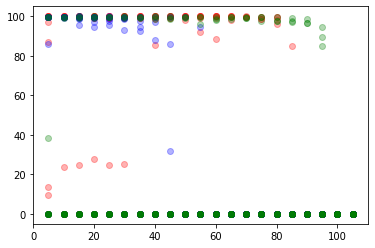

In [77]:
import matplotlib.pyplot as plt
plt.plot(redData["RGB difference"],redData["confidence"],"o",color = "red", alpha = 0.3)
plt.plot(blueData["RGB difference"],blueData["confidence"],"o",color = "blue", alpha = 0.3)
plt.plot(greenData["RGB difference"],greenData["confidence"],"o",color = "green", alpha = 0.3)

(80.0, 100.0)

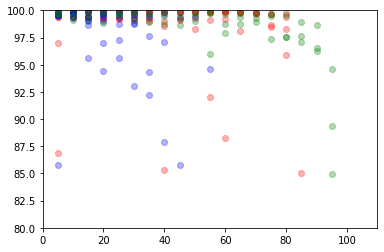

In [78]:
plt.plot(redData["RGB difference"],redData["confidence"],"o",color = "red", alpha = 0.3)
plt.plot(blueData["RGB difference"],blueData["confidence"],"o",color = "blue", alpha = 0.3)
plt.plot(greenData["RGB difference"],greenData["confidence"],"o",color = "green", alpha = 0.3)
plt.ylim([80, 100])

In [54]:
array = np.zeros((252,4))
greenData = pd.DataFrame(array, columns = ['RGB difference', 'pixel value', 'confidence', 'color'])
row = 0
for i in range(len(greenDF)):
    for j in range(len(greenDF.iloc[0])):
        rgbDiff = (i+1)*5
        pixel = greenDF.columns[j]
        confidence = greenDF.iloc[i,j]
        color = "green"
        greenData.iloc[row] = [rgbDiff, pixel, confidence, color]
        row += 1
greenData["index"] = greenData.index
greenData

,RGB difference,pixel value,confidence,color,index
0,5.0,144,99.698792,green,0
1,5.0,130,99.650726,green,1
2,5.0,120,99.751610,green,2
3,5.0,110,0.000000,green,3
4,5.0,100,0.000000,green,4
...,...,...,...,...,...
247,105.0,70,0.000000,green,247
248,105.0,60,0.000000,green,248
249,105.0,50,0.000000,green,249
250,105.0,40,0.000000,green,250


In [55]:
array = np.zeros((252,4))
blueData = pd.DataFrame(array, columns = ['RGB difference', 'pixel value', 'confidence', 'color'])
row = 0
for i in range(len(blueDF)):
    for j in range(len(blueDF.iloc[0])):
        rgbDiff = (i+1)*5
        pixel = blueDF.columns[j]
        confidence = blueDF.iloc[i,j]
        color = "blue"
        
        blueData.iloc[row] = [rgbDiff, pixel, confidence, color]
        row += 1
blueData["index"] = blueData.index
blueData

,RGB difference,pixel value,confidence,color,index
0,5.0,144,99.754379,blue,0
1,5.0,130,99.690659,blue,1
2,5.0,120,99.741791,blue,2
3,5.0,110,99.612083,blue,3
4,5.0,100,99.593277,blue,4
...,...,...,...,...,...
247,105.0,70,0.000000,blue,247
248,105.0,60,0.000000,blue,248
249,105.0,50,0.000000,blue,249
250,105.0,40,0.000000,blue,250


In [60]:
df_all = pd.concat([redData,blueData,greenData])

In [82]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('confidence ~ C(color) + C(index)', data=df_all).fit()
print(sm.stats.anova_lm(model))
print(model.summary())

             df         sum_sq       mean_sq          F        PR(>F)
C(color)    2.0   47929.067939  23964.533970  18.004191  2.809204e-08
C(index)  251.0  770301.139942   3068.928844   2.305640  1.333302e-15
Residual  502.0  668188.631708   1331.053051        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     2.430
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.76e-17
Time:                        07:24:15   Log-Likelihood:                -3637.2
No. Observations:                 756   AIC:                             7782.
Df Residuals:                     502   BIC:                             8958.
Df Model:                         253                                         
Covarianc

In [16]:
xRed = redData[['RGB difference', 'pixel value']]
yRed = redData[['confidence']]
# use sklearn
from sklearn import linear_model
redReg = linear_model.LinearRegression()
redReg.fit(xRed, yRed)
print(redReg.coef_)
print(redReg.intercept_)
# use sm to get p values
import statsmodels.api as sm
xRed2 = sm.add_constant(xRed)
redOLS = sm.OLS(yRed.astype(float), xRed2.astype(float))
redOLS2 = redOLS.fit()
print(redOLS2.summary())

[[-0.71723105  0.54318545]]
[32.55103456]
                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     70.65
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           4.97e-25
Time:                        22:35:07   Log-Likelihood:                -1276.5
No. Observations:                 252   AIC:                             2559.
Df Residuals:                     249   BIC:                             2570.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
co

In [17]:
xGreen = greenData[['RGB difference', 'pixel value']]
yGreen = greenData[['confidence']]

# use sm to get p values
xGreen2 = sm.add_constant(xGreen)
greenOLS = sm.OLS(yGreen.astype(float), xGreen2.astype(float))
greenOLS2 = greenOLS.fit()
print(greenOLS2.summary())

                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     127.6
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           6.96e-39
Time:                        22:35:12   Log-Likelihood:                -1205.9
No. Observations:                 252   AIC:                             2418.
Df Residuals:                     249   BIC:                             2428.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -40.5975      5.871     -6.

In [18]:
xBlue = blueData[['RGB difference', 'pixel value']]
yBlue = blueData[['confidence']]

# use sm to get p values
xBlue2 = sm.add_constant(xBlue)
blueOLS = sm.OLS(yBlue.astype(float), xBlue2.astype(float))
blueOLS2 = blueOLS.fit()
print(blueOLS2.summary())

                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     141.1
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.08e-41
Time:                        22:35:14   Log-Likelihood:                -1199.6
No. Observations:                 252   AIC:                             2405.
Df Residuals:                     249   BIC:                             2416.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             27.7719      5.726      4.